# 📊 Orders Data Analysis & Insights

Welcome to this notebook!   
Here we explore and analyze the **Orders dataset** located at:

📁 `Data/Raw_Data/Orders.csv`

This notebook is designed as an **end-to-end data analysis pipeline**, starting from raw data ingestion all the way to clean, insight-driven visualizations that support business decision-making.

---

## 🎯 Objectives

By the end of this analysis, we aim to:

- 🧹 Clean and preprocess raw order data using reproducible steps  
- 📈 Perform Exploratory Data Analysis (EDA) to uncover patterns and trends  
- 🌍 Identify top-performing countries and markets  
- 🛒 Analyze revenue and quantity by **category** and **item**  
- 💾 Export a final, analysis-ready dataset to:  
  `Data/Cleaned_Data/Cleaned_Orders.csv`

---

## 🧠 What You’ll Find Inside

This notebook includes:

- ✅ A transparent and reusable **data cleaning pipeline**  
- 📋 Summary tables for sales and quantities  
- 📊 Clear and insightful visualizations  
- 💡 Actionable business insights derived from real data  

All steps are structured to make the analysis easy to understand, modify, and re-run when new data arrives.

---

✨ *Built with clarity, reusability, and insight in mind.*


# Setup

## import libraries

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

## Fetch Data 

In [23]:
df = pd.read_csv(r'./Data/Raw_Data/Orders.csv')
df

,Date:,28/9/2023,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,Time,5:22 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Order ID,Order Date,Country,City,Branch,Lat,Lng,Customer First Name,Customer Last Name,Email,Phone Number,Category,Sub Category,Item,SalesPerson ID,Quantity,Unit Price,Discount,Status
4,1,1/1/2023,Syria,homs,hs01,34.7326,36.7136,lina,alrrashid,LINA.ALRRASHID@MAIL.COM,Tel: 5634962795,Tablet,Apple iPad,"iPad Pro 12.9""",N498,1,999,39.96,FALSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20003,19996,1/9/2023,Morocco,casablanca,cs01,33.5731,7.5898,ahmad,iad,AHMAD.IAD@MAIL.COM,Tel: 5880578642,Gaming Console,Sony PlayStation,PlayStation 4 Pro,M210,1,399,11.97,TRUE
20004,19997,1/9/2023,Syria,homs,hs01,34.7326,36.7136,ali,kiali,Ali.kiali@mail.com,Tel: 5286384144,Smartwatch,Fossil Gen,Fossil Gen 6,Z826,2,299,59.8,TRUE
20005,19998,1/9/2023,USA,las vegas,lv01,36.1699,-115.1398,husayn,salayk,husayn.salayk@mail.com,Tel: 5463888674,Gaming Console,Sony PlayStation,PlayStation 2,K624,1,99,2.97,TRUE
20006,19999,1/9/2023,Saudi Arabia,jeddah,jd03,21.4858,39.1925,fatin,bahriin,Fatin.bahriin@mail.com,Tel: 5931562498,Headphones,JBL Live,JBL Live 500BT,Y368,1,99,3.96,TRUE



# Data Cleaning

## Quick Explore

In [24]:
df.head(10)

,Date:,28/9/2023,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,Time,5:22 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Order ID,Order Date,Country,City,Branch,Lat,Lng,Customer First Name,Customer Last Name,Email,Phone Number,Category,Sub Category,Item,SalesPerson ID,Quantity,Unit Price,Discount,Status
4,1,1/1/2023,Syria,homs,hs01,34.7326,36.7136,lina,alrrashid,LINA.ALRRASHID@MAIL.COM,Tel: 5634962795,Tablet,Apple iPad,"iPad Pro 12.9""",N498,1,999,39.96,FALSE
5,2,1/1/2023,Saudi Arabia,riyadh,rd01,24.7136,46.6753,omar,eurul,OMAR.EURUL@MAIL.COM,Tel: 5311455624,Smartphone,Samsung Galaxy,Galaxy S21 Ultra,X918,1,1199,119.9,TRUE
6,3,1/1/2023,Saudi Arabia,riyadh,rd03,24.7743,46.7386,iman,iismaeil,IMAN.IISMAEIL@MAIL.COM,Tel: 5272740777,Digital Camera,Panasonic Lumix,Panasonic Lumix GH5,I036,1,1299,NaN,TRUE
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4,1/1/2023,United Arab Emirates,abu dhabi,ad01,24.4539,54.3773,ahmad,rihan,AHMAD.RIHAN@MAIL.COM,Tel: 5783343440,Tablet,Samsung Galaxy Tab,Galaxy Tab A8,E804,2,199,27.86,TRUE
9,5,1/1/2023,USA,washington,wh01,38.9072,-77.0369,sami,altawil,Sami.altawil@mail.com,Tel: 5352774687,Headphones,Sennheiser HD,Sennheiser HD 450BT,Q149,1,129,3.87,TRUE


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20008 entries, 0 to 20007
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date:        20002 non-null  object
 1   28/9/2023    20002 non-null  object
 2   Unnamed: 2   20001 non-null  object
 3   Unnamed: 3   20001 non-null  object
 4   Unnamed: 4   20001 non-null  object
 5   Unnamed: 5   20001 non-null  object
 6   Unnamed: 6   20001 non-null  object
 7   Unnamed: 7   20001 non-null  object
 8   Unnamed: 8   20001 non-null  object
 9   Unnamed: 9   20001 non-null  object
 10  Unnamed: 10  20001 non-null  object
 11  Unnamed: 11  20001 non-null  object
 12  Unnamed: 12  20001 non-null  object
 13  Unnamed: 13  20001 non-null  object
 14  Unnamed: 14  20001 non-null  object
 15  Unnamed: 15  20001 non-null  object
 16  Unnamed: 16  20001 non-null  object
 17  Unnamed: 17  18890 non-null  object
 18  Unnamed: 18  20001 non-null  object
dtypes: object(19)
memory usag

## Fix Data Columns and Index

In [26]:
df.drop(range(3),inplace=True)
df.reset_index(inplace=True,drop=True)
df.columns = df.iloc[0]
df.reset_index(inplace=True,drop=True)
df.drop(0,inplace=True)
df.reset_index(inplace=True,drop=True)
df.columns = df.columns.str.strip()

## Missing Values Handling

In [27]:
df.dropna(how="all",inplace=True)
df.isna().sum()


0
Order ID                  0
Order Date                0
Country                   0
City                      0
Branch                    0
Lat                       0
Lng                       0
Customer First Name       0
Customer Last Name        0
Email                     0
Phone Number              0
Category                  0
Sub Category              0
Item                      0
SalesPerson ID            0
Quantity                  0
Unit Price                0
Discount               1111
Status                    0
dtype: int64

In [28]:
df.fillna(0,inplace=True)
df.isna().sum()

0
Order ID               0
Order Date             0
Country                0
City                   0
Branch                 0
Lat                    0
Lng                    0
Customer First Name    0
Customer Last Name     0
Email                  0
Phone Number           0
Category               0
Sub Category           0
Item                   0
SalesPerson ID         0
Quantity               0
Unit Price             0
Discount               0
Status                 0
dtype: int64

## Data Types Conversion

In [29]:
df['Quantity'] = df['Quantity'].astype(int)
df['Unit Price'] = df['Unit Price'].astype(float)
df['Discount'] = df['Discount'].astype(float)

## Transforming Data

In [30]:
df['Phone Number'] = df['Phone Number'].str.replace("Tel:","")
df['Phone Number'] = df['Phone Number'].apply(lambda x: x[0:4]+"-"+x[4:8]+"-"+x[8:])

In [31]:
df['Customer First Name'] = df['Customer First Name'].str.capitalize()
df['Customer Last Name'] = df['Customer Last Name'].str.capitalize()
df['Customer First Name'] = df["Customer First Name"] + ' ' + df['Customer Last Name']
df.drop(columns="Customer Last Name",inplace=True)
df = df.rename(columns={"Customer First Name":"Full Name"})

In [32]:
df['Unit Price'] = df['Unit Price'].abs()
df['Discount'] = ((df['Discount'] / df['Unit Price']) * 100).round(2)
df['Total Price'] = (df["Quantity"] * (1 - df['Discount'] / 100) * df["Unit Price"])
df.insert(17, 'Total Price', df.pop('Total Price'))
df['Total Price'] = df['Total Price'].round()

In [33]:
df['Email'] = df['Email'].str.replace(r'@', '@g', regex=True)
df['Email'] = df['Email'].str.replace(r'\.', '', regex=True)
df['Email'] = df['Email'].str.lower()
df

,Order ID,Order Date,Country,City,Branch,Lat,Lng,Full Name,Email,Phone Number,Category,Sub Category,Item,SalesPerson ID,Quantity,Unit Price,Discount,Total Price,Status
0,1,1/1/2023,Syria,homs,hs01,34.7326,36.7136,Lina Alrrashid,linaalrrashid@gmailcom,563-4962-795,Tablet,Apple iPad,"iPad Pro 12.9""",N498,1,999.0,4.0,959.0,FALSE
1,2,1/1/2023,Saudi Arabia,riyadh,rd01,24.7136,46.6753,Omar Eurul,omareurul@gmailcom,531-1455-624,Smartphone,Samsung Galaxy,Galaxy S21 Ultra,X918,1,1199.0,10.0,1079.0,TRUE
2,3,1/1/2023,Saudi Arabia,riyadh,rd03,24.7743,46.7386,Iman Iismaeil,imaniismaeil@gmailcom,527-2740-777,Digital Camera,Panasonic Lumix,Panasonic Lumix GH5,I036,1,1299.0,0.0,1299.0,TRUE
4,4,1/1/2023,United Arab Emirates,abu dhabi,ad01,24.4539,54.3773,Ahmad Rihan,ahmadrihan@gmailcom,578-3343-440,Tablet,Samsung Galaxy Tab,Galaxy Tab A8,E804,2,199.0,14.0,342.0,TRUE
5,5,1/1/2023,USA,washington,wh01,38.9072,-77.0369,Sami Altawil,samialtawil@gmailcom,535-2774-687,Headphones,Sennheiser HD,Sennheiser HD 450BT,Q149,1,129.0,3.0,125.0,TRUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19999,19996,1/9/2023,Morocco,casablanca,cs01,33.5731,7.5898,Ahmad Iad,ahmadiad@gmailcom,588-0578-642,Gaming Console,Sony PlayStation,PlayStation 4 Pro,M210,1,399.0,3.0,387.0,TRUE
20000,19997,1/9/2023,Syria,homs,hs01,34.7326,36.7136,Ali Kiali,alikiali@gmailcom,528-6384-144,Smartwatch,Fossil Gen,Fossil Gen 6,Z826,2,299.0,20.0,478.0,TRUE
20001,19998,1/9/2023,USA,las vegas,lv01,36.1699,-115.1398,Husayn Salayk,husaynsalayk@gmailcom,546-3888-674,Gaming Console,Sony PlayStation,PlayStation 2,K624,1,99.0,3.0,96.0,TRUE
20002,19999,1/9/2023,Saudi Arabia,jeddah,jd03,21.4858,39.1925,Fatin Bahriin,fatinbahriin@gmailcom,593-1562-498,Headphones,JBL Live,JBL Live 500BT,Y368,1,99.0,4.0,95.0,TRUE


In [34]:
df['City'] = df['City'].str.capitalize()
df

,Order ID,Order Date,Country,City,Branch,Lat,Lng,Full Name,Email,Phone Number,Category,Sub Category,Item,SalesPerson ID,Quantity,Unit Price,Discount,Total Price,Status
0,1,1/1/2023,Syria,Homs,hs01,34.7326,36.7136,Lina Alrrashid,linaalrrashid@gmailcom,563-4962-795,Tablet,Apple iPad,"iPad Pro 12.9""",N498,1,999.0,4.0,959.0,FALSE
1,2,1/1/2023,Saudi Arabia,Riyadh,rd01,24.7136,46.6753,Omar Eurul,omareurul@gmailcom,531-1455-624,Smartphone,Samsung Galaxy,Galaxy S21 Ultra,X918,1,1199.0,10.0,1079.0,TRUE
2,3,1/1/2023,Saudi Arabia,Riyadh,rd03,24.7743,46.7386,Iman Iismaeil,imaniismaeil@gmailcom,527-2740-777,Digital Camera,Panasonic Lumix,Panasonic Lumix GH5,I036,1,1299.0,0.0,1299.0,TRUE
4,4,1/1/2023,United Arab Emirates,Abu dhabi,ad01,24.4539,54.3773,Ahmad Rihan,ahmadrihan@gmailcom,578-3343-440,Tablet,Samsung Galaxy Tab,Galaxy Tab A8,E804,2,199.0,14.0,342.0,TRUE
5,5,1/1/2023,USA,Washington,wh01,38.9072,-77.0369,Sami Altawil,samialtawil@gmailcom,535-2774-687,Headphones,Sennheiser HD,Sennheiser HD 450BT,Q149,1,129.0,3.0,125.0,TRUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19999,19996,1/9/2023,Morocco,Casablanca,cs01,33.5731,7.5898,Ahmad Iad,ahmadiad@gmailcom,588-0578-642,Gaming Console,Sony PlayStation,PlayStation 4 Pro,M210,1,399.0,3.0,387.0,TRUE
20000,19997,1/9/2023,Syria,Homs,hs01,34.7326,36.7136,Ali Kiali,alikiali@gmailcom,528-6384-144,Smartwatch,Fossil Gen,Fossil Gen 6,Z826,2,299.0,20.0,478.0,TRUE
20001,19998,1/9/2023,USA,Las vegas,lv01,36.1699,-115.1398,Husayn Salayk,husaynsalayk@gmailcom,546-3888-674,Gaming Console,Sony PlayStation,PlayStation 2,K624,1,99.0,3.0,96.0,TRUE
20002,19999,1/9/2023,Saudi Arabia,Jeddah,jd03,21.4858,39.1925,Fatin Bahriin,fatinbahriin@gmailcom,593-1562-498,Headphones,JBL Live,JBL Live 500BT,Y368,1,99.0,4.0,95.0,TRUE


In [35]:
df['Status'] = df['Status'].str.capitalize()
df

,Order ID,Order Date,Country,City,Branch,Lat,Lng,Full Name,Email,Phone Number,Category,Sub Category,Item,SalesPerson ID,Quantity,Unit Price,Discount,Total Price,Status
0,1,1/1/2023,Syria,Homs,hs01,34.7326,36.7136,Lina Alrrashid,linaalrrashid@gmailcom,563-4962-795,Tablet,Apple iPad,"iPad Pro 12.9""",N498,1,999.0,4.0,959.0,False
1,2,1/1/2023,Saudi Arabia,Riyadh,rd01,24.7136,46.6753,Omar Eurul,omareurul@gmailcom,531-1455-624,Smartphone,Samsung Galaxy,Galaxy S21 Ultra,X918,1,1199.0,10.0,1079.0,True
2,3,1/1/2023,Saudi Arabia,Riyadh,rd03,24.7743,46.7386,Iman Iismaeil,imaniismaeil@gmailcom,527-2740-777,Digital Camera,Panasonic Lumix,Panasonic Lumix GH5,I036,1,1299.0,0.0,1299.0,True
4,4,1/1/2023,United Arab Emirates,Abu dhabi,ad01,24.4539,54.3773,Ahmad Rihan,ahmadrihan@gmailcom,578-3343-440,Tablet,Samsung Galaxy Tab,Galaxy Tab A8,E804,2,199.0,14.0,342.0,True
5,5,1/1/2023,USA,Washington,wh01,38.9072,-77.0369,Sami Altawil,samialtawil@gmailcom,535-2774-687,Headphones,Sennheiser HD,Sennheiser HD 450BT,Q149,1,129.0,3.0,125.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19999,19996,1/9/2023,Morocco,Casablanca,cs01,33.5731,7.5898,Ahmad Iad,ahmadiad@gmailcom,588-0578-642,Gaming Console,Sony PlayStation,PlayStation 4 Pro,M210,1,399.0,3.0,387.0,True
20000,19997,1/9/2023,Syria,Homs,hs01,34.7326,36.7136,Ali Kiali,alikiali@gmailcom,528-6384-144,Smartwatch,Fossil Gen,Fossil Gen 6,Z826,2,299.0,20.0,478.0,True
20001,19998,1/9/2023,USA,Las vegas,lv01,36.1699,-115.1398,Husayn Salayk,husaynsalayk@gmailcom,546-3888-674,Gaming Console,Sony PlayStation,PlayStation 2,K624,1,99.0,3.0,96.0,True
20002,19999,1/9/2023,Saudi Arabia,Jeddah,jd03,21.4858,39.1925,Fatin Bahriin,fatinbahriin@gmailcom,593-1562-498,Headphones,JBL Live,JBL Live 500BT,Y368,1,99.0,4.0,95.0,True


## Export Cleaned Data

### Final Check

In [36]:
df.head(10)

,Order ID,Order Date,Country,City,Branch,Lat,Lng,Full Name,Email,Phone Number,Category,Sub Category,Item,SalesPerson ID,Quantity,Unit Price,Discount,Total Price,Status
0,1,1/1/2023,Syria,Homs,hs01,34.7326,36.7136,Lina Alrrashid,linaalrrashid@gmailcom,563-4962-795,Tablet,Apple iPad,"iPad Pro 12.9""",N498,1,999.0,4.0,959.0,False
1,2,1/1/2023,Saudi Arabia,Riyadh,rd01,24.7136,46.6753,Omar Eurul,omareurul@gmailcom,531-1455-624,Smartphone,Samsung Galaxy,Galaxy S21 Ultra,X918,1,1199.0,10.0,1079.0,True
2,3,1/1/2023,Saudi Arabia,Riyadh,rd03,24.7743,46.7386,Iman Iismaeil,imaniismaeil@gmailcom,527-2740-777,Digital Camera,Panasonic Lumix,Panasonic Lumix GH5,I036,1,1299.0,0.0,1299.0,True
4,4,1/1/2023,United Arab Emirates,Abu dhabi,ad01,24.4539,54.3773,Ahmad Rihan,ahmadrihan@gmailcom,578-3343-440,Tablet,Samsung Galaxy Tab,Galaxy Tab A8,E804,2,199.0,14.0,342.0,True
5,5,1/1/2023,USA,Washington,wh01,38.9072,-77.0369,Sami Altawil,samialtawil@gmailcom,535-2774-687,Headphones,Sennheiser HD,Sennheiser HD 450BT,Q149,1,129.0,3.0,125.0,True
6,6,1/1/2023,Syria,Aleppo,al01,36.2021,37.1343,Ahed Salim,ahedsalim@gmailcom,527-7356-213,Smartwatch,Garmin Fenix,Garmin Fenix 6S,J431,1,499.0,1.0,494.0,True
7,7,1/1/2023,Saudi Arabia,Riyadh,rd01,24.7136,46.6753,Amira Alrahil,amiraalrahil@gmailcom,565-3467-109,Digital Camera,Panasonic Lumix,Panasonic Lumix S1H,S190,1,3499.0,6.0,3289.0,True
9,8,1/1/2023,Egypt,Cairo,cr02,30.0444,31.2357,Muhamad Bitahish,muhamadbitahish@gmailcom,570-5221-103,Headphones,Anker Soundcore,Anker Soundcore Liberty Air 2 Pro,R389,1,99.0,1.0,98.0,False
10,9,1/1/2023,Saudi Arabia,Aseer,as01,18.2311,42.5004,Fadi Aljabaan,fadialjabaan@gmailcom,527-1157-029,Laptop,HP Envy,Envy x360,I974,1,899.0,0.0,899.0,True
11,10,1/1/2023,USA,Washington,wh01,38.9072,-77.0369,Zahir Almunajid,zahiralmunajid@gmailcom,515-1565-826,Smart Speaker,Apple HomePod,Apple HomePod mini,R236,9,99.0,72.0,249.0,True


### Export

In [37]:
df.to_csv(r'./Data/Cleaned_Data/Cleaned_Orders.csv',index=False)


# EDA 

In [38]:
df

,Order ID,Order Date,Country,City,Branch,Lat,Lng,Full Name,Email,Phone Number,Category,Sub Category,Item,SalesPerson ID,Quantity,Unit Price,Discount,Total Price,Status
0,1,1/1/2023,Syria,Homs,hs01,34.7326,36.7136,Lina Alrrashid,linaalrrashid@gmailcom,563-4962-795,Tablet,Apple iPad,"iPad Pro 12.9""",N498,1,999.0,4.0,959.0,False
1,2,1/1/2023,Saudi Arabia,Riyadh,rd01,24.7136,46.6753,Omar Eurul,omareurul@gmailcom,531-1455-624,Smartphone,Samsung Galaxy,Galaxy S21 Ultra,X918,1,1199.0,10.0,1079.0,True
2,3,1/1/2023,Saudi Arabia,Riyadh,rd03,24.7743,46.7386,Iman Iismaeil,imaniismaeil@gmailcom,527-2740-777,Digital Camera,Panasonic Lumix,Panasonic Lumix GH5,I036,1,1299.0,0.0,1299.0,True
4,4,1/1/2023,United Arab Emirates,Abu dhabi,ad01,24.4539,54.3773,Ahmad Rihan,ahmadrihan@gmailcom,578-3343-440,Tablet,Samsung Galaxy Tab,Galaxy Tab A8,E804,2,199.0,14.0,342.0,True
5,5,1/1/2023,USA,Washington,wh01,38.9072,-77.0369,Sami Altawil,samialtawil@gmailcom,535-2774-687,Headphones,Sennheiser HD,Sennheiser HD 450BT,Q149,1,129.0,3.0,125.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19999,19996,1/9/2023,Morocco,Casablanca,cs01,33.5731,7.5898,Ahmad Iad,ahmadiad@gmailcom,588-0578-642,Gaming Console,Sony PlayStation,PlayStation 4 Pro,M210,1,399.0,3.0,387.0,True
20000,19997,1/9/2023,Syria,Homs,hs01,34.7326,36.7136,Ali Kiali,alikiali@gmailcom,528-6384-144,Smartwatch,Fossil Gen,Fossil Gen 6,Z826,2,299.0,20.0,478.0,True
20001,19998,1/9/2023,USA,Las vegas,lv01,36.1699,-115.1398,Husayn Salayk,husaynsalayk@gmailcom,546-3888-674,Gaming Console,Sony PlayStation,PlayStation 2,K624,1,99.0,3.0,96.0,True
20002,19999,1/9/2023,Saudi Arabia,Jeddah,jd03,21.4858,39.1925,Fatin Bahriin,fatinbahriin@gmailcom,593-1562-498,Headphones,JBL Live,JBL Live 500BT,Y368,1,99.0,4.0,95.0,True


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 20003
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        20000 non-null  object 
 1   Order Date      20000 non-null  object 
 2   Country         20000 non-null  object 
 3   City            20000 non-null  object 
 4   Branch          20000 non-null  object 
 5   Lat             20000 non-null  object 
 6   Lng             20000 non-null  object 
 7   Full Name       20000 non-null  object 
 8   Email           20000 non-null  object 
 9   Phone Number    20000 non-null  object 
 10  Category        20000 non-null  object 
 11  Sub Category    20000 non-null  object 
 12  Item            20000 non-null  object 
 13  SalesPerson ID  20000 non-null  object 
 14  Quantity        20000 non-null  int64  
 15  Unit Price      20000 non-null  float64
 16  Discount        20000 non-null  float64
 17  Total Price     20000 non-null  floa

In [44]:
df.describe(include=['number'])


,Quantity,Unit Price,Discount,Total Price
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,1.936750,609.292000,10.079300,896.527250
std,2.288736,617.976051,15.027555,1444.145749
min,1.000000,29.000000,0.000000,-7796.000000
25%,1.000000,179.000000,3.000000,195.000000
50%,1.000000,399.000000,6.000000,469.000000
75%,2.000000,899.000000,10.000000,1047.250000
max,13.000000,3999.000000,130.000000,31992.000000


In [45]:
print("-"*50)
print(df.shape)
print("-"*50)
print(df.columns)
print("-"*50)

--------------------------------------------------
(20000, 19)
--------------------------------------------------
Index(['Order ID', 'Order Date', 'Country', 'City', 'Branch', 'Lat', 'Lng',
       'Full Name', 'Email', 'Phone Number', 'Category', 'Sub Category',
       'Item', 'SalesPerson ID', 'Quantity', 'Unit Price', 'Discount',
       'Total Price', 'Status'],
      dtype='object', name=0)
--------------------------------------------------


In [46]:
print(df['Status'].unique())
print("-"*50)
print(df['Category'].unique())
print("-"*50)
print(df['Sub Category'].unique())
print("-"*50)
print(df['Item'].unique())
print("-"*50)

['False' 'True']
--------------------------------------------------
['Tablet' 'Smartphone' 'Digital Camera' 'Headphones' 'Smartwatch' 'Laptop'
 'Smart Speaker' 'VR Headset' 'Fitness Tracker' 'Gaming Console']
--------------------------------------------------
['Apple iPad' 'Samsung Galaxy' 'Panasonic Lumix' 'Samsung Galaxy Tab'
 'Sennheiser HD' 'Garmin Fenix' 'Anker Soundcore' 'HP Envy'
 'Apple HomePod' 'Lenovo Legion' 'Fossil Gen' 'Amazon Fire' 'Lenovo Tab'
 'Oculus Rift' 'Sony Cyber-shot' 'JBL Live' 'Sony WH' 'Apple MacBook'
 'OnePlus' 'Fitbit Versa' 'Fujifilm X Series' 'Samsung Galaxy Tab S'
 'Huawei Watch' 'Bose QuietComfort' 'Xiaomi Mi' 'Pimax Vision' 'ASUS ROG'
 'Sony Alpha' 'Xiaomi Redmi' 'Garmin Vivosmart' 'HP Reverb G2 Omnicept'
 'JBL Link' 'Withings Move' 'Garmin Venu' 'Sony PlayStation' 'Google Nest'
 'Amazon Fire HD' 'Valve Index' 'HTC Vive' 'HP Pavilion' 'Sonos One'
 'Microsoft Surface' 'Nikon Coolpix' 'Amazon Echo' 'Lenovo ThinkPad'
 'Garmin Approach' 'Amazfit GTR' 'Harma

## Aggregation and Grouping

In [49]:
# agg_df = the orders has been delivered
agg_df = df[df['Status'] == "True"][["Country", "Category", "Sub Category", "Item", "Quantity", "Unit Price", "Total Price"]]
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14013 entries, 1 to 20003
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       14013 non-null  object 
 1   Category      14013 non-null  object 
 2   Sub Category  14013 non-null  object 
 3   Item          14013 non-null  object 
 4   Quantity      14013 non-null  int64  
 5   Unit Price    14013 non-null  float64
 6   Total Price   14013 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 875.8+ KB


In [50]:
top_country_ordered = agg_df.groupby(['Country']).agg({"Quantity":["sum"]})
top_country_ordered.sort_values(by=("Quantity", "sum"),ascending=False)

,Quantity
,sum
Country,
Saudi Arabia,8298
USA,5850
United Arab Emirates,3869
Syria,3502
Egypt,3278
France,1526
Morocco,877


In [51]:
top_country_paid = agg_df.groupby(['Country']).agg({"Total Price":["sum"]})
top_country_paid.sort_values(by=("Total Price", "sum"),ascending=False)

,Total Price
,sum
Country,
Saudi Arabia,3821753.0
USA,2764045.0
United Arab Emirates,1701035.0
Syria,1569260.0
Egypt,1526289.0
France,730478.0
Morocco,404978.0


In [52]:
# most category paid and ordered
agg_df.groupby("Category").sum(numeric_only=True)

,Quantity,Unit Price,Total Price
Category,,,
Digital Camera,2508,2073808.0,2911441.0
Fitness Tracker,2620,172242.0,252816.0
Gaming Console,2751,376134.0,552555.0
Headphones,2697,362531.0,528883.0
Laptop,3222,2025155.0,3091559.0
Smart Speaker,2531,252291.0,356713.0
Smartphone,2718,999473.0,1460660.0
Smartwatch,2634,438410.0,645424.0
Tablet,2810,728992.0,1042454.0


In [53]:
country_category_sales = agg_df.groupby(["Country","Category"]).sum(numeric_only=True)
country_category_sales.sort_values(by="Total Price",ascending=False)

0                             Quantity  Unit Price  Total Price
Country      Category                                          
Saudi Arabia Laptop                983    624685.0     955775.0
             Digital Camera        842    684111.0     953027.0
USA          Laptop                658    439364.0     678399.0
             Digital Camera        503    428124.0     603703.0
Saudi Arabia VR Headset            752    353659.0     482421.0
...                                ...         ...          ...
Morocco      Headphones             70     10697.0      13149.0
             Smart Speaker         104      8014.0      12195.0
France       Fitness Tracker       144      9240.0      11916.0
Morocco      Gaming Console         60     10393.0      11641.0
             Fitness Tracker        95      5045.0       8176.0

[70 rows x 3 columns]

In [54]:
category_totals = agg_df.groupby(["Category"]).sum(numeric_only=True)
category_totals.sort_values(by="Total Price",ascending=False)

,Quantity,Unit Price,Total Price
Category,,,
Laptop,3222,2025155.0,3091559.0
Digital Camera,2508,2073808.0,2911441.0
VR Headset,2709,1122681.0,1675333.0
Smartphone,2718,999473.0,1460660.0
Tablet,2810,728992.0,1042454.0
Smartwatch,2634,438410.0,645424.0
Gaming Console,2751,376134.0,552555.0
Headphones,2697,362531.0,528883.0
Smart Speaker,2531,252291.0,356713.0


In [55]:
item_totals = agg_df.groupby(["Item"]).sum(numeric_only=True)
item_totals.sort_values(by="Total Price",ascending=False)

,Quantity,Unit Price,Total Price
Item,,,
Canon EOS R5,133,295926.0,428088.0
Panasonic Lumix S1H,112,223936.0,306926.0
ASUS ROG Flow Z13,163,182427.0,283155.0
"MacBook Pro 16""",135,155935.0,277033.0
XPS 15,191,137514.0,229532.0
...,...,...,...
Galaxy Tab A7,1,179.0,165.0
Amazon Fire HD 10,1,149.0,139.0
Sony WH-CH710N,1,129.0,129.0


In [56]:
country_sales = agg_df.groupby(["Country"]).agg({"Total Price":["sum"]})
country_sales.sort_values(by=("Total Price","sum"),ascending=False)


,Total Price
,sum
Country,
Saudi Arabia,3821753.0
USA,2764045.0
United Arab Emirates,1701035.0
Syria,1569260.0
Egypt,1526289.0
France,730478.0
Morocco,404978.0



## Visualize Data

<Axes: >

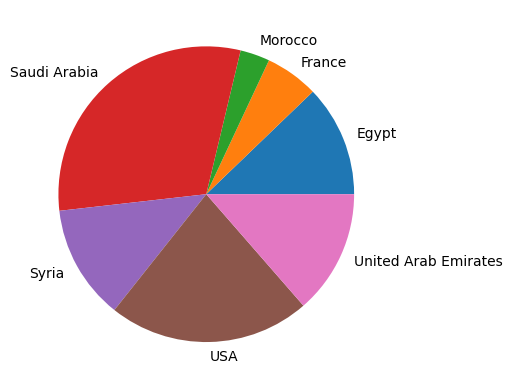

In [57]:
country_sales.plot.pie(y="Total Price",legend=False, ylabel='')

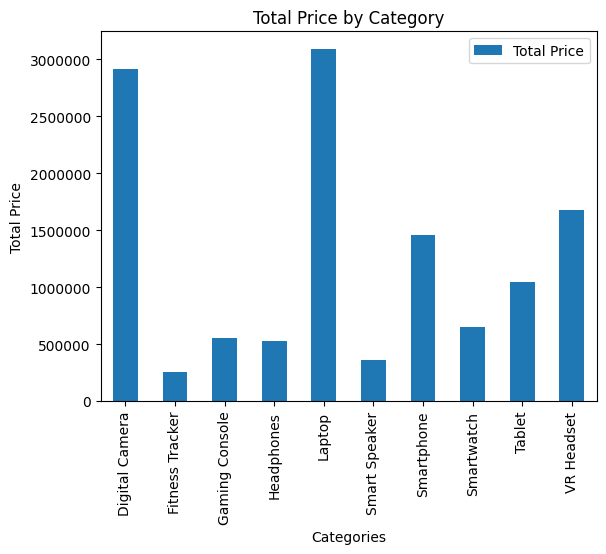

In [59]:
category_totals.plot(kind="bar",y='Total Price')

plt.ticklabel_format(style='plain', axis='y')

plt.xlabel("Categories")
plt.ylabel("Total Price")

plt.title("Total Price by Category")
plt.show()

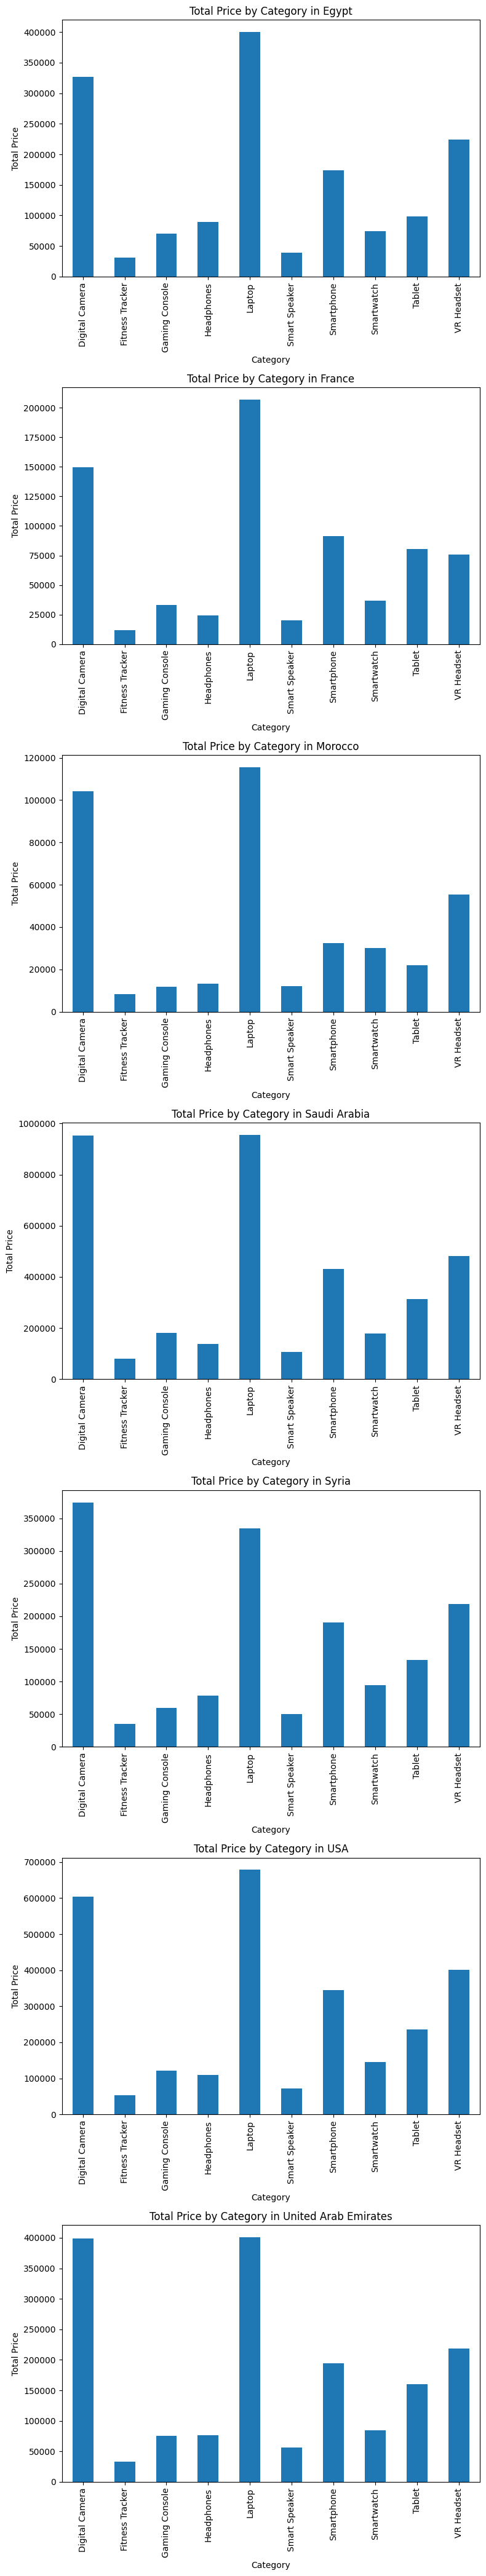

In [60]:
# Group by 'Country' and 'Category', then sum 'Total Price'
country_category_sales = agg_df.groupby(["Country", "Category"]).sum(numeric_only=True).reset_index()

# Get the list of unique countries
countries = country_category_sales['Country'].unique()

# Create a subplot for each country
fig, axes = plt.subplots(nrows=len(countries), ncols=1, figsize=(8, 6 * len(countries)))

# If there's only one country, axes will not be an array, so we wrap it in a list
if len(countries) == 1:
    axes = [axes]

# Plot each country's data in its own subplot
for i, country in enumerate(countries):
    # Filter data for the current country
    country_data = country_category_sales[country_category_sales['Country'] == country]
    
    # Plot the bar chart for the current country
    ax = axes[i]
    country_data.plot(kind="bar", x='Category', y='Total Price', legend=False, ax=ax)
    
    # Disable scientific notation on the y-axis
    ax.ticklabel_format(style='plain', axis='y')
    
    # Add labels and title
    ax.set_xlabel("Category")
    ax.set_ylabel("Total Price")
    ax.set_title(f"Total Price by Category in {country}")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()